## Name:Ansumaan Panda
## Regd. No:2141016070

# Movie Review Sentiment Analysis

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
train_df=pd.read_csv(r"C:\Users\user\Desktop\Downloads\sentiment-analysis-on-movie-reviews\train.tsv.zip",sep='\t')
test_df = pd.read_csv(r"C:\Users\user\Desktop\Downloads\sentiment-analysis-on-movie-reviews\test.tsv.zip",sep='\t')
sub_df = pd.read_csv(r"C:\Users\user\Desktop\Downloads\sentiment-analysis-on-movie-reviews\sampleSubmission.csv",sep='\t')

In [7]:

train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [9]:
test_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [11]:
sub_df.head()

,"PhraseId,Sentiment"
0,"156061,2"
1,"156062,2"
2,"156063,2"
3,"156064,2"
4,"156065,2"


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [15]:
#shape of all data
print("train - ",train_df.shape)
print("test - ",test_df.shape)
print("Submission - ",sub_df.shape)

train -  (156060, 4)
test -  (66292, 3)
Submission -  (66292, 1)


In [17]:
print(train_df.Sentiment.value_counts(normalize=True).sort_index())

Sentiment
0    0.045316
1    0.174760
2    0.509945
3    0.210989
4    0.058990
Name: proportion, dtype: float64


<Axes: xlabel='Sentiment'>

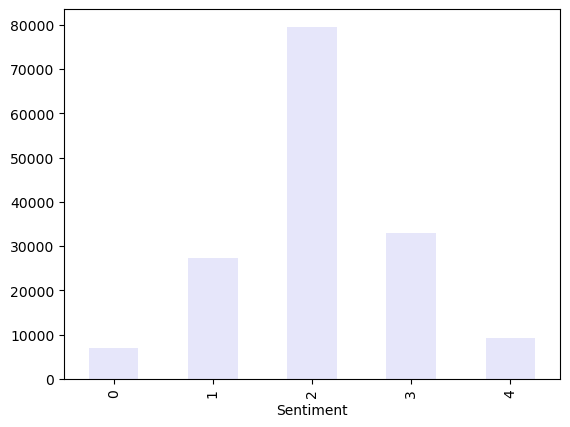

In [19]:
train_df.Sentiment.value_counts().sort_index().plot(kind='bar',color='lavender')

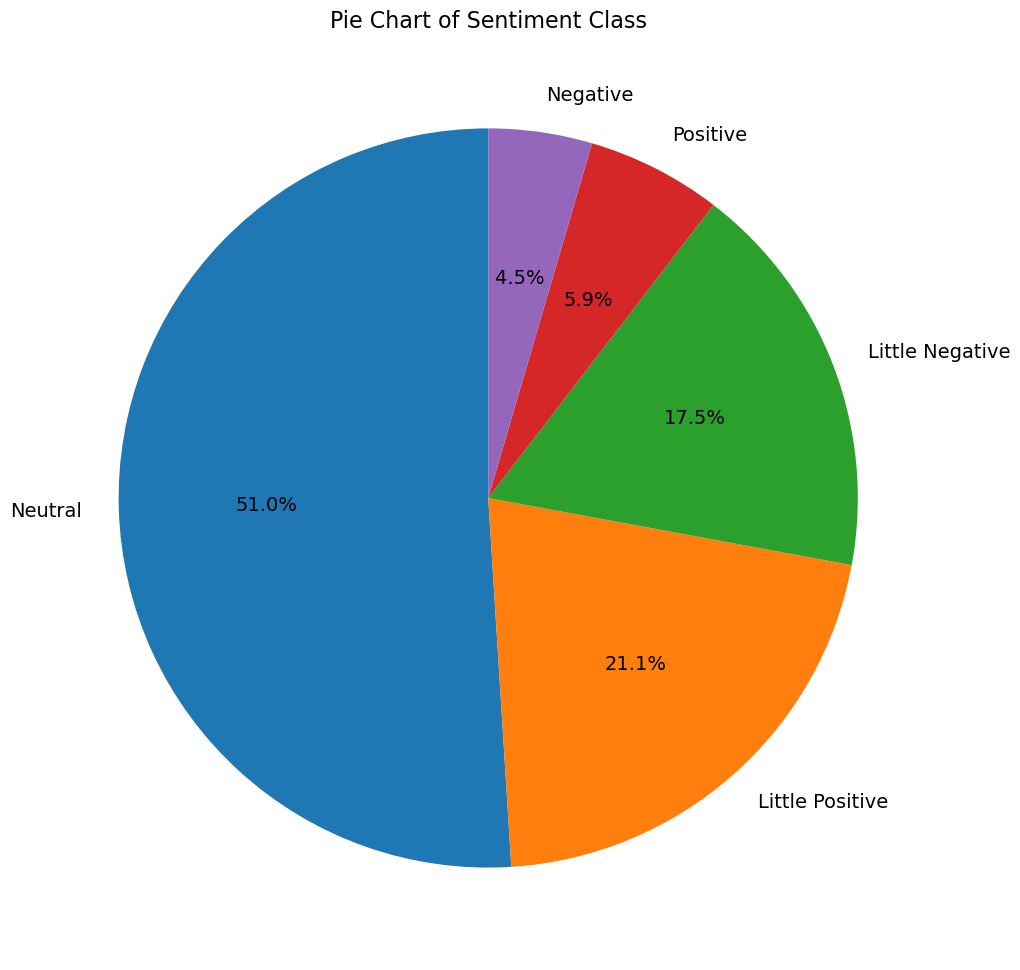

In [28]:
df2 = train_df.copy(deep=True)
pie1 = pd.DataFrame(df2['Sentiment'].replace(0, 'Negative')
                                .replace(1, 'Little Negative')
                                .replace(2, 'Neutral')
                                .replace(3, 'Little Positive')
                                .replace(4, 'Positive')
                                .value_counts())

# Reset index and specify column names
pie1.reset_index(inplace=True)
pie1.columns = ['Sentiment_Label', 'Count']  # Rename columns

# Plotting the pie chart
plt.figure(figsize=(12, 12))
plt.pie(pie1['Count'], labels=pie1['Sentiment_Label'], autopct='%1.1f%%', shadow=False, startangle=90, textprops={'fontsize': 14})
plt.title('Pie Chart of Sentiment Class', fontsize=16)
plt.show()


In [30]:
#this will give us some random samples of our data
train_df.Phrase.sample(10).values

array(['most of the movie',
       "So purely enjoyable that you might not even notice it 's a fairly straightforward remake of Hollywood comedies such as Father of the Bride .",
       'Roman', 'in Case of Fire', 'is now',
       'spent watching this waste of time', 'David Kendall',
       'substituting',
       "Some may choose to interpret the film 's end as hopeful or optimistic",
       "his constant need to suddenly transpose himself into another character undermines the story 's continuity and progression"],
      dtype=object)

In [32]:
train_df.Phrase

0         A series of escapades demonstrating the adage ...
1         A series of escapades demonstrating the adage ...
2                                                  A series
3                                                         A
4                                                    series
                                ...                        
156055                                            Hearst 's
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [34]:
#some Phrases with 0-Sentiment
train_df[train_df.Sentiment == 0].Phrase.values[:10]

array(['would have a hard time sitting through this one',
       'have a hard time sitting through this one',
       'Aggressive self-glorification and a manipulative whitewash',
       'self-glorification and a manipulative whitewash',
       'Trouble Every Day is a plodding mess .', 'is a plodding mess',
       'plodding mess', 'could hate it for the same reason', 'hate it',
       'hate'], dtype=object)

In [36]:
#some Phrases with 1-Sentiment
train_df[train_df.Sentiment == 1].Phrase.values[:10]

array(['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
       'the gander , some of which occasionally amuses but none of which amounts to much of a story',
       'but none of which amounts to much of a story',
       'none of which amounts to much of a story',
       "Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",
       ', I suspect , would have a hard time sitting through this one .',
       'would have a hard time sitting through this one .',
       'a hard time sitting through this one', 'a hard time', 'hard time'],
      dtype=object)

In [38]:
#some Phrases with 2-Sentiment
train_df[train_df.Sentiment == 2].Phrase.values[:10]

array(['A series of escapades demonstrating the adage that what is good for the goose',
       'A series', 'A', 'series',
       'of escapades demonstrating the adage that what is good for the goose',
       'of',
       'escapades demonstrating the adage that what is good for the goose',
       'escapades',
       'demonstrating the adage that what is good for the goose',
       'demonstrating the adage'], dtype=object)

In [40]:
#some Phrases with 3-Sentiment
train_df[train_df.Sentiment == 3].Phrase.values[:10]

array(['good for the goose', 'good', 'amuses',
       'This quiet , introspective and entertaining independent',
       'quiet , introspective and entertaining',
       ', introspective and entertaining',
       'introspective and entertaining', 'introspective and',
       'is worth seeking .', 'fans'], dtype=object)

In [42]:
# some Phrases with 4-Sentiment
train_df[train_df.Sentiment == 4].Phrase.values[:10]

array(['This quiet , introspective and entertaining independent is worth seeking .',
       'quiet , introspective and entertaining independent',
       'entertaining', 'is worth seeking',
       'A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera',
       'A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder',
       'thrilling',
       'A comedy-drama of nearly epic proportions rooted in a sincere performance by the title character undergoing midlife crisis .',
       'nearly epic',
       'rooted in a sincere performance by the title character undergoing midlife crisis .'],
      dtype=object)

In [44]:
train_df.shape,test_df.shape

((156060, 4), (66292, 3))

In [46]:
# Learn Vocabulary using TfidfVectorizer
# Create custom tokenizer with stemming
# Create a list of stop words
# Configure and create TfidfVectorizer
# Learn vocubulary from training set
# View sample entries from vocabulary

In [48]:
#import required libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

In [50]:
#setup for english language
stemmer  = SnowballStemmer(language='english')

In [52]:
#function to create tokenizer
def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text)]

In [56]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download the 'punkt' resource
nltk.download('punkt')

# Define your tokenize function with stemming
def tokenize(text):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in word_tokenize(text)]

# Test the tokenize function
print(tokenize("Hey how are you going"))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['hey', 'how', 'are', 'you', 'go']


In [60]:
import nltk

# Download the 'stopwords' resource
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [62]:
from nltk.corpus import stopwords

# Creating stopword list for the English language
eng_stopword = stopwords.words('english')
print(eng_stopword)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [64]:
#here are some english stop words
', '.join(eng_stopword[:115])

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some"

In [66]:
#select some stopwords
selected_stopwords = eng_stopword[:115]

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
#creating vectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenize,
                             stop_words = selected_stopwords,
                             ngram_range=(1,2),
                             max_features=2000)

In [72]:
vectorizer.fit(train_df.Phrase)

TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x00000286B6DA3060>)

In [74]:
len(vectorizer.vocabulary_)

2000

In [76]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '&', "'", "' `", "''", "'d", "'d expect", "'em", "'ll",
       "'m", "'re", "'s", "'s -rrb-", "'s also", "'s best", "'s film",
       "'s go", "'s good", "'s hard", "'s just", "'s like", "'s movi",
       "'s no", "'s not", "'s noth", "'s perform", "'s so", "'s someth",
       "'s still", "'s too", "'s veri", "'s work", "'ve", "'ve seen", '*',
       '* \\', ',', ", '", ", 'll", ", 're", ", 's", ', ,', ', `', ', ``',
       ', also', ', amus', ', becaus', ', charact', ', direct', ', doe',
       ', emot', ', especi', ', even', ', feel', ', film', ', funni',
       ', good', ', ha', ', hi', ', intellig', ', just', ', least',
       ', like', ', love', ', make', ', movi', ", n't", ', never', ', no',
       ', not', ', often', ', one', ', onli', ', rather', ', realli',
       ', so', ', sometim', ', still', ', thi', ', though', ', time',
       ', too', ', ultim', ', veri', ', visual', ', well', ', will',
       ', would', ', yet', '-', '- ,', '--', "-- 's", '-- ,', '-lrb

# Transform Training & Test Data
# Transform phrases from training set
# Transform phrases from test set
# Look at some example values

In [81]:
train_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [83]:
%%time
inputs = vectorizer.transform(train_df.Phrase)

CPU times: total: 25.2 s
Wall time: 27.4 s


In [86]:
inputs.shape

(156060, 2000)

In [88]:
inputs.toarray()[0][:50]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.10501782, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [90]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [94]:
# Replace NaN values with empty strings
test_df['Phrase'].fillna('', inplace=True)

# Now transform the test inputs
test_inputs = vectorizer.transform(test_df.Phrase)


In [96]:
test_inputs.shape

(66292, 2000)

In [98]:
#take train size to split test data from training data
TRAIN_SIZE = 100_000

In [100]:
#creating inputs and targets for train data
train_inputs = inputs[:TRAIN_SIZE]
train_targets = train_df.Sentiment[:TRAIN_SIZE]

In [102]:
#checking the shape of targets to know the data range is samem or not
train_inputs.shape,train_targets.shape

((100000, 2000), (100000,))

In [104]:
#creating inputs and targets for validation data
val_inputs = inputs[TRAIN_SIZE:]
val_targets = train_df.Sentiment[TRAIN_SIZE:]

In [106]:
#checking the shape of targets to know the data range is samem or not
val_inputs.shape,val_targets.shape


((56060, 2000), (56060,))

# Model-1 Logistic Regression Model

In [109]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [111]:
%%time
model.fit(train_inputs,train_targets)

CPU times: total: 6.12 s
Wall time: 2.86 s


LogisticRegression()

In [113]:
train_preds = model.predict(train_inputs)
train_targets

0        1
1        2
2        2
3        2
4        2
        ..
99995    2
99996    2
99997    3
99998    2
99999    4
Name: Sentiment, Length: 100000, dtype: int64

In [115]:
train_preds


array([3, 2, 2, ..., 1, 2, 2], dtype=int64)

In [117]:
from sklearn.metrics import accuracy_score
#accuracy of our prdictions
print("Accuracy Score of prediction on training data-->",accuracy_score(train_targets,train_preds))

Accuracy Score of prediction on training data--> 0.64041


In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#try with test(validation) data
val_pred_1 = model.predict(val_inputs)

In [121]:
print("Accuracy Score of prediction on validation data-->",accuracy_score(val_targets,val_pred_1))

Accuracy Score of prediction on validation data--> 0.576703531930075


In [123]:
#classificatiopn report for model predictions
from sklearn.metrics import classification_report
report = classification_report(val_targets,val_pred_1)
print(report)

              precision    recall  f1-score   support

           0       0.38      0.11      0.17      2619
           1       0.47      0.30      0.37     10342
           2       0.63      0.85      0.72     27799
           3       0.49      0.41      0.44     11835
           4       0.50      0.18      0.26      3465

    accuracy                           0.58     56060
   macro avg       0.49      0.37      0.39     56060
weighted avg       0.55      0.58      0.54     56060



In [125]:
small_df = train_df.sample(20)
small_df

,PhraseId,SentenceId,Phrase,Sentiment
48948,48949,2389,routinely,2
124861,124862,6709,the swinging,2
13879,13880,597,is that I truly enjoyed most of Mostly Martha ...,3
23093,23094,1046,with multiple,2
122960,122961,6599,almost immediately,2
141604,141605,7683,"ruined by amateurish writing and acting , whil...",1
4914,4915,191,The dragons are the real stars of Reign of Fire,2
2205,2206,83,emotional,2
71031,71032,3622,she continually tries to accommodate to fit in...,2
23980,23981,1089,Measured against practically any like-themed f...,2


In [127]:
#transform small df into vectors
small_inputs = vectorizer.transform(small_df.Phrase)
small_preds = model.predict(small_inputs)
small_preds

array([2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2],
      dtype=int64)

In [129]:
small_df.Sentiment

48948     2
124861    2
13879     3
23093     2
122960    2
141604    1
4914      2
2205      2
71031     2
23980     2
66197     2
118344    3
39260     3
110632    1
147507    3
49896     1
43009     2
130426    3
2434      3
47619     2
Name: Sentiment, dtype: int64

# Predictions

In [132]:
test_preds = model.predict(test_inputs)
test_preds

array([3, 3, 2, ..., 2, 2, 2], dtype=int64)

In [134]:
sub_df

,"PhraseId,Sentiment"
0,"156061,2"
1,"156062,2"
2,"156063,2"
3,"156064,2"
4,"156065,2"
...,...
66287,"222348,2"
66288,"222349,2"
66289,"222350,2"
66290,"222351,2"


In [136]:
sub_df.Sentiment = test_preds
sub_df

,"PhraseId,Sentiment"
0,"156061,2"
1,"156062,2"
2,"156063,2"
3,"156064,2"
4,"156065,2"
...,...
66287,"222348,2"
66288,"222349,2"
66289,"222350,2"
66290,"222351,2"


In [140]:
# Display the first few lines of the CSV file using Python
with open('submission_logisticRegression.csv', 'r') as file:
    for _ in range(10):  # Change 10 to however many lines you want to see
        print(file.readline().strip())


"PhraseId,Sentiment"
"156061,2"
"156062,2"
"156063,2"
"156064,2"
"156065,2"
"156066,2"
"156067,2"
"156068,2"
"156069,2"


## Train & Finetune Different ML Models¶
### Train & finetune 2 other types of model# 

Model-2 --> Decision Trees Model

In [144]:
from sklearn import tree
model_2 = tree.DecisionTreeClassifier()
model_2.fit(train_inputs, train_targets)

DecisionTreeClassifier()

In [146]:
train_pred_2 = model_2.predict(train_inputs)
train_targets

0        1
1        2
2        2
3        2
4        2
        ..
99995    2
99996    2
99997    3
99998    2
99999    4
Name: Sentiment, Length: 100000, dtype: int64

In [148]:
train_pred_2

array([1, 2, 2, ..., 3, 2, 2], dtype=int64)

In [150]:
print("Accuracy Score of prediction on Training data-->",accuracy_score(train_targets,train_pred_2))

Accuracy Score of prediction on Training data--> 0.83


In [152]:
#classificatiopn report for model predictions
report = classification_report(train_targets,train_pred_2)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      4453
           1       0.82      0.71      0.76     16931
           2       0.81      0.94      0.87     51783
           3       0.87      0.69      0.77     21092
           4       0.95      0.68      0.79      5741

    accuracy                           0.83    100000
   macro avg       0.85      0.77      0.80    100000
weighted avg       0.84      0.83      0.83    100000



In [154]:
val_pred_2 = model_2.predict(val_inputs)
val_pred_2 

array([1, 2, 2, ..., 2, 2, 2], dtype=int64)

In [156]:
print("Accuracy Score of prediction on validation data-->",accuracy_score(val_targets,val_pred_2))

Accuracy Score of prediction on validation data--> 0.5171958615768819


In [158]:
test_preds_2 = model_2.predict(test_inputs)
test_preds_2

array([2, 4, 2, ..., 2, 2, 1], dtype=int64)

In [160]:
sub_df.Sentiment = test_preds_2
sub_df

,"PhraseId,Sentiment"
0,"156061,2"
1,"156062,2"
2,"156063,2"
3,"156064,2"
4,"156065,2"
...,...
66287,"222348,2"
66288,"222349,2"
66289,"222350,2"
66290,"222351,2"


In [162]:
sub_df.to_csv('submission_Decision_Trees.csv',index=None)


In [166]:
# Display the first few lines of the CSV file using Python
with open('submission_Decision_Trees.csv', 'r') as file:
    for _ in range(10):  # Adjust the range to display more or fewer lines
        print(file.readline().strip())


"PhraseId,Sentiment"
"156061,2"
"156062,2"
"156063,2"
"156064,2"
"156065,2"
"156066,2"
"156067,2"
"156068,2"
"156069,2"


In [168]:
#split data for naive b 
from sklearn.model_selection import train_test_split
train_inputs_nb, val_inputs_nb, train_targets_nb, val_targets_nb = train_test_split(inputs, train_df['Sentiment'], test_size=0.25, random_state=5)

In [170]:
#using Naive bayes classifier for prediction
from sklearn.naive_bayes import MultinomialNB
model_3 = MultinomialNB()
model_3.fit(train_inputs_nb,train_targets_nb)

MultinomialNB()

In [172]:
train_pred_3 = model_3.predict(train_inputs_nb)
train_pred_3

array([2, 3, 3, ..., 2, 2, 1], dtype=int64)

In [174]:
print("Accuracy Score of prediction on Training data-->",accuracy_score(train_targets_nb,train_pred_3))

Accuracy Score of prediction on Training data--> 0.573762228202828


In [176]:
#classificatiopn report for model predictions
report = classification_report(train_targets_nb,train_pred_3)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.04      0.07      5298
           1       0.54      0.16      0.25     20460
           2       0.58      0.95      0.72     59684
           3       0.55      0.27      0.36     24671
           4       0.72      0.06      0.11      6932

    accuracy                           0.57    117045
   macro avg       0.60      0.30      0.30    117045
weighted avg       0.58      0.57      0.50    117045



In [178]:
val_pred_3 = model_3.predict(val_inputs_nb)
val_pred_3

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [180]:
print("Accuracy Score of prediction on validation data-->",accuracy_score(val_targets_nb,val_pred_3))

Accuracy Score of prediction on validation data--> 0.5651928745354351


In [182]:
test_pred_3 = model_3.predict(test_inputs)
test_pred_3

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [184]:
sub_df.Sentiment = test_pred_3
sub_df

,"PhraseId,Sentiment"
0,"156061,2"
1,"156062,2"
2,"156063,2"
3,"156064,2"
4,"156065,2"
...,...
66287,"222348,2"
66288,"222349,2"
66289,"222350,2"
66290,"222351,2"


In [186]:
sub_df.to_csv("submission_Naive_bayes_classifier.csv",index=None)

Best Model : Logistic Regression

In [189]:
print('Accuracy for Logistic Regression:'+str('{:04.2f}'.format(accuracy_score(val_targets,val_pred_1)*100))+'%')
print('Accuracy for Decision Trees Model:'+str('{:04.2f}'.format(accuracy_score(val_targets,val_pred_2)*100))+'%')
print('Accuracy for Naive bayes classifier:'+str('{:04.2f}'.format(accuracy_score(val_targets_nb,val_pred_3)*100))+'%')

Accuracy for Logistic Regression:57.67%
Accuracy for Decision Trees Model:51.72%
Accuracy for Naive bayes classifier:56.52%
